In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
import h5py
import pandas as pd
from scipy import stats

In [2]:
from scdc.materials import SILICON

2022-01-12 14:34:09.448351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 14:34:09.448420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Read the data

In [3]:
m_nt_SI = np.concatenate((np.linspace(1, 9, 9) * 1e6, np.linspace(1, 9, 9) * 1e7))

In [4]:
data_7 = np.load('../data/pQP_fig7.npy')
m_7 = np.logspace(6,8,3)
data_8 = np.load('../data/pQP_fig8.npy')
m_8 = np.logspace(6,8,5)
data_9 = np.load('../data/pQP_fig9.npy')
m_9 = np.logspace(6,8,7)

In [5]:
data = h5py.File('../data/test_bins.hdf5','a')

### Just to remember the structure of the HDF5 file

In [13]:
data.keys()

<KeysViewHDF5 ['Nevents_100', 'Nevents_1000', 'Nevents_1500', 'Nevents_2000', 'Nevents_500', 'Nevents_5000']>

In [7]:
data['Nevents_1000'].keys()

<KeysViewHDF5 ['sim_0', 'sim_1', 'sim_2', 'sim_3', 'sim_4', 'sim_5', 'sim_6', 'sim_7', 'sim_8', 'sim_9']>

In [8]:
data['Nevents_1000/sim_0'].keys()

<KeysViewHDF5 ['Ph_dist_0', 'Ph_dist_1', 'Ph_dist_10', 'Ph_dist_11', 'Ph_dist_12', 'Ph_dist_13', 'Ph_dist_14', 'Ph_dist_15', 'Ph_dist_16', 'Ph_dist_17', 'Ph_dist_2', 'Ph_dist_3', 'Ph_dist_4', 'Ph_dist_5', 'Ph_dist_6', 'Ph_dist_7', 'Ph_dist_8', 'Ph_dist_9', 'QP_dist_0', 'QP_dist_1', 'QP_dist_10', 'QP_dist_11', 'QP_dist_12', 'QP_dist_13', 'QP_dist_14', 'QP_dist_15', 'QP_dist_16', 'QP_dist_17', 'QP_dist_2', 'QP_dist_3', 'QP_dist_4', 'QP_dist_5', 'QP_dist_6', 'QP_dist_7', 'QP_dist_8', 'QP_dist_9']>

In [9]:
data['Nevents_1000/sim_0/Ph_dist_0'].attrs.keys()

<KeysViewHDF5 ['dm_m', 'pval', 'pval_10', 'pval_100', 'pval_1000', 'pval_2', 'pval_5']>

### Build of the data frame containing the relevant info

In [6]:
full_data = []
for i in data.keys():
    n_events = i[8:]
    n_sims = len(data[i])
    for j in range(n_sims):
        n_dm_m = int(len(data[i + '/sim_' + str(j)].keys()) / 2)
        for k in range(n_dm_m):
            #qp_pval = data[i + '/sim_' + str(j) + '/QP_dist_' + str(k)].attrs['pval']
            #ph_pval = data[i + '/sim_' + str(j) + '/Ph_dist_' + str(k)].attrs['pval']
            #dm_m    = data[i + '/sim_' + str(j) + '/Ph_dist_' + str(k)].attrs['dm_m']
            #full_data.append((float(n_events), 1, dm_m, qp_pval))
            #full_data.append((float(n_events), 2, dm_m, ph_pval))
            attrs_list = []
            attrs_list.append(float(n_events))
            attrs_list.append(1)            
            for h in data[i + '/sim_' + str(j) + '/QP_dist_' + str(k)].attrs.keys():
                attrs_list.append(data[i + '/sim_' + str(j) + '/QP_dist_' + str(k)].attrs[h])
            full_data.append(attrs_list)
            attrs_list = []
            attrs_list.append(float(n_events))
            attrs_list.append(2)            
            for h in data[i + '/sim_' + str(j) + '/Ph_dist_' + str(k)].attrs.keys():
                attrs_list.append(data[i + '/sim_' + str(j) + '/Ph_dist_' + str(k)].attrs[h])
            full_data.append(attrs_list)
full_data = np.asarray(full_data)

In [7]:
names = list(['N_events', 'Type'])
for i in data['Nevents_1000/sim_0/Ph_dist_0'].attrs.keys():
    names.append(i)

In [8]:
df = pd.DataFrame(full_data, columns = names)

In [9]:
df

,N_events,Type,dm_m,pval,pval_10,pval_100,pval_1000,pval_2,pval_5
0,100.0,1.0,1000000.0,3.956203e-02,1.420747e-01,3.956203e-02,3.956203e-02,0.793362,1.420747e-01
1,100.0,2.0,1000000.0,3.069595e-01,6.306845e-01,4.007710e-01,3.074715e-01,0.864272,6.306845e-01
2,100.0,1.0,2000000.0,2.205412e-01,3.935274e-01,2.704744e-01,2.704744e-01,0.712582,3.935274e-01
3,100.0,2.0,2000000.0,7.975191e-02,4.180790e-01,1.430330e-01,1.005256e-01,0.857467,4.180790e-01
4,100.0,1.0,3000000.0,8.655265e-01,9.953607e-01,9.398305e-01,8.873532e-01,1.000000,9.953607e-01
...,...,...,...,...,...,...,...,...,...
2155,5000.0,2.0,70000000.0,2.278598e-01,2.850055e-01,2.850055e-01,2.472191e-01,0.838954,2.850055e-01
2156,5000.0,1.0,80000000.0,8.491643e-09,4.191902e-08,1.957454e-08,8.210866e-09,0.000086,4.191902e-08
2157,5000.0,2.0,80000000.0,1.454014e-04,3.587136e-04,3.306859e-04,1.663253e-04,0.006672,3.587136e-04
2158,5000.0,1.0,90000000.0,2.222779e-09,3.996326e-08,5.459283e-09,2.433951e-09,0.000005,5.140810e-08


In [15]:
#df_3_qp    = df[(df['N_events'] == 3.) & (df['Type'] == 1.)]
#df_5_qp    = df[(df['N_events'] == 5.) & (df['Type'] == 1.)]
#df_10_qp   = df[(df['N_events'] == 10.) & (df['Type'] == 1.)]
df_100_qp  = df[(df['N_events'] == 100.) & (df['Type'] == 1.)]
df_500_qp  = df[(df['N_events'] == 500.) & (df['Type'] == 1.)]
df_1000_qp = df[(df['N_events'] == 1000.) & (df['Type'] == 1.)]
df_1500_qp = df[(df['N_events'] == 1500.) & (df['Type'] == 1.)]
df_2000_qp = df[(df['N_events'] == 2000.) & (df['Type'] == 1.)]
#df_5000_qp = df[(df['N_events'] == 5000.) & (df['Type'] == 1.)]

In [11]:
bin_edges = m_nt_SI

#mean10, _, _ = stats.binned_statistic(df_10_qp['dm_m'], df_10_qp['pval'], bins = bin_edges)
#std10, _, _  = stats.binned_statistic(df_10_qp['dm_m'], df_10_qp['pval'], 'std', bins = bin_edges)
#mean10_10, _, _ = stats.binned_statistic(df_10_qp['dm_m'], df_10_qp['pval_10'], bins = bin_edges)
#std10_10, _, _  = stats.binned_statistic(df_10_qp['dm_m'], df_10_qp['pval_10'], 'std', bins = bin_edges)

#mean5, _, _ = stats.binned_statistic(df_5_qp['dm_m'], df_5_qp['pval'], bins = bin_edges)
#std5, _, _  = stats.binned_statistic(df_5_qp['dm_m'], df_5_qp['pval'], 'std', bins = bin_edges)

#mean3, _, _ = stats.binned_statistic(df_3_qp['dm_m'], df_3_qp['pval'], bins = bin_edges)
#std3, _, _  = stats.binned_statistic(df_3_qp['dm_m'], df_3_qp['pval'], 'std', bins = bin_edges)

mean100, _, _ = stats.binned_statistic(df_100_qp['dm_m'], df_100_qp['pval'], bins = bin_edges)
std100, _, _  = stats.binned_statistic(df_100_qp['dm_m'], df_100_qp['pval'], 'std', bins = bin_edges)

mean500, _, _ = stats.binned_statistic(df_500_qp['dm_m'], df_500_qp['pval'], bins = bin_edges)
std500, _, _  = stats.binned_statistic(df_500_qp['dm_m'], df_500_qp['pval'], 'std', bins = bin_edges)

mean1000, _, _ = stats.binned_statistic(df_1000_qp['dm_m'], df_1000_qp['pval'], bins = bin_edges)
std1000, _, _  = stats.binned_statistic(df_1000_qp['dm_m'], df_1000_qp['pval'], 'std', bins = bin_edges)

#mean5000, _, _ = stats.binned_statistic(df_5000_qp['dm_m'], df_5000_qp['pval'], bins = bin_edges)
#std5000, _, _  = stats.binned_statistic(df_5000_qp['dm_m'], df_5000_qp['pval'], 'std', bins = bin_edges)

bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

# Plots

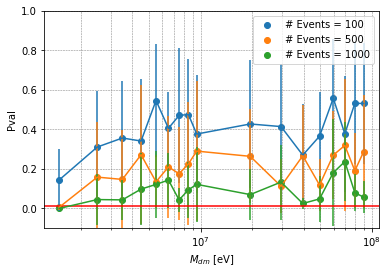

In [57]:
sets  = [df_100_qp, df_500_qp, df_1000_qp]
names = ['# Events = 100', '# Events = 500', '# Events = 1000']
pvals = ['pval']

for i, val in enumerate(sets):
    for j in pvals:
        mean, _, _ = stats.binned_statistic(val['dm_m'], val[j], bins = bin_edges)
        std, _, _  = stats.binned_statistic(val['dm_m'], val[j], 'std', bins = bin_edges)
        plt.scatter(bin_centers, mean, label = names[i])
        plt.errorbar(bin_centers, mean, std)
plt.legend()

plt.xlabel('$M_{dm}$ [eV]')
plt.ylabel('Pval')
plt.xscale('log')
plt.ylim((-0.1,1))
#plt.yscale('log')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'major')
plt.axhline(1e-2, c = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'minor', axis = 'x')

In [12]:
def quantiles(data, pval, centers, val_quantiles = [0.16, 0.5, 0.84]):
    min_vals = []
    max_vals = []
    mean_vals = []
    for i in range(len(centers)):
        aux = data[(data['dm_m'] == centers[i])]
        quant_vals = np.quantile(aux[pval], val_quantiles)
        min_vals.append(quant_vals[0])
        mean_vals.append(quant_vals[1])
        max_vals.append(quant_vals[2])
    return min_vals, mean_vals, max_vals

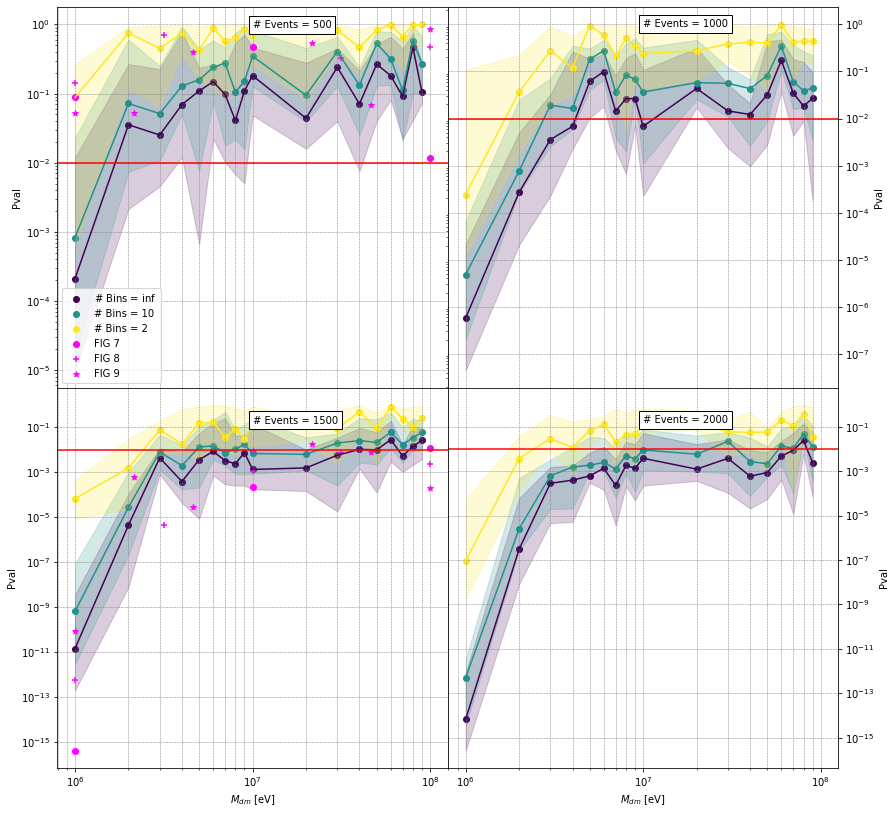

In [19]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = False, figsize = (14, 14), gridspec_kw = dict(hspace = 0, wspace = 0))

names = [ '# Bins = $\inf$', '# Bins = 10', '# Bins = 2']
pvals = ['pval','pval_10', 'pval_2']
cmap = get_cmap('viridis', len(pvals))

sets  = [df_500_qp]
for i, val in enumerate(sets):
    for j, val_j in enumerate(pvals):
        #mean, _, _ = stats.binned_statistic(val['dm_m'], val[val_j], bins = bin_edges)
        #std, _, _  = stats.binned_statistic(val['dm_m'], val[val_j], 'std', bins = bin_edges)
        #ax[0,0].scatter(bin_centers, mean, label = names[j], color = 'green')
        #ax[0,0].plot(bin_centers, mean, color = cmap(j))
        #ax[0,0].fill_between(bin_centers, (mean - std), (mean + std), alpha = 0.2, color = cmap(j))
        min_vals, mean_vals, max_vals = quantiles(val, val_j, centers = m_nt_SI)
        ax[0,0].scatter(m_nt_SI, mean_vals, label = names[j], color = cmap(j))
        ax[0,0].plot(m_nt_SI, mean_vals, color = cmap(j))
        ax[0,0].fill_between(m_nt_SI, min_vals, max_vals, alpha = 0.2, color = cmap(j))
ax[0,0].scatter(m_7, data_7[0,:], c = 'magenta', marker = 'o', label = 'FIG 7')  
ax[0,0].scatter(m_8, data_8[0,:], c = 'magenta', marker = '+', label = 'FIG 8')  
ax[0,0].scatter(m_9, data_9[0,:], c = 'magenta', marker = '*', label = 'FIG 9')  
        
ax[0,0].legend()
ax[0,0].text(1e7, 0.9, '# Events = 500', bbox = dict(facecolor='white'))
ax[0,0].set_xlabel('$M_{dm}$ [eV]')
ax[0,0].set_ylabel('Pval')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
#ax[0,0].set_ylim((-0.2, 1.2))
ax[0,0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'major')
ax[0,0].axhline(1e-2, c = 'red')
ax[0,0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'minor', axis = 'x')

sets  = [df_1000_qp]
for i, val in enumerate(sets):
    for j, val_j in enumerate(pvals):
        #mean, _, _ = stats.binned_statistic(val['dm_m'], val[val_j], bins = bin_edges)
        #std, _, _  = stats.binned_statistic(val['dm_m'], val[val_j], 'std', bins = bin_edges)
        #ax[0,1].scatter(bin_centers, mean, label = names[j], color = cmap(j))
        #ax[0,1].plot(bin_centers, mean, color = cmap(j))
        #ax[0,1].fill_between(bin_centers, (mean - std), (mean + std), alpha = 0.2, color = cmap(j))      
        min_vals, mean_vals, max_vals = quantiles(val, val_j, centers = m_nt_SI)
        ax[0,1].scatter(m_nt_SI, mean_vals, label = names[j], color = cmap(j))
        ax[0,1].plot(m_nt_SI, mean_vals, color = cmap(j))
        ax[0,1].fill_between(m_nt_SI, min_vals, max_vals, alpha = 0.2, color = cmap(j))
        
ax[0,1].text(1e7, 0.9, '# Events = 1000', bbox = dict(facecolor='white'))
#ax[0,1].set_ylim((-0.2, 1.2))
ax[0,1].set_ylabel('Pval')
ax[0,1].set_xlabel('')
ax[0,1].tick_params(left = False, right = True, labelleft=False, labelright=True, labelbottom=False)
ax[0,1].yaxis.set_label_position("right")
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'major')
ax[0,1].axhline(1e-2, c = 'red')
ax[0,1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'minor', axis = 'x')

sets  = [df_1500_qp]
for i, val in enumerate(sets):
    for j, val_j in enumerate(pvals):
        #mean, _, _ = stats.binned_statistic(val['dm_m'], val[val_j], bins = bin_edges, statistic='mean')
        #std, _, _  = stats.binned_statistic(val['dm_m'], val[val_j],statistic='std', bins = bin_edges)
        #ax[1,0].scatter(bin_centers, mean, label = names[j], color = 'green')
        #ax[1,0].plot(bin_centers, mean, color = 'green')
        #ax[1,0].fill_between(bin_centers, (mean - std), (mean + std), alpha = 0.2, color = 'green')      
        min_vals, mean_vals, max_vals = quantiles(val, val_j, centers = m_nt_SI)
        ax[1,0].scatter(m_nt_SI, mean_vals, label = names[j], color = cmap(j))
        ax[1,0].plot(m_nt_SI, mean_vals, color = cmap(j))
        ax[1,0].fill_between(m_nt_SI, min_vals, max_vals, alpha = 0.2, color = cmap(j))
ax[1,0].scatter(m_7, data_7[2,:], marker = 'o', c = 'magenta')  
ax[1,0].scatter(m_8, data_8[2,:], marker = '+', c = 'magenta')  
ax[1,0].scatter(m_9, data_9[2,:], marker = '*', c = 'magenta') 

ax[1,0].text(1e7, 0.15, '# Events = 1500', bbox = dict(facecolor='white'))
ax[1,0].set_xlabel('$M_{dm}$ [eV]')
ax[1,0].set_ylabel('Pval')
#ax[1,1].set_ylim((1e-7, 0.5))
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'major')
ax[1,0].axhline(1e-2, c = 'red')
ax[1,0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'minor', axis = 'x')
ax[1,0].set_ylabel('Pval')

sets  = [df_2000_qp]
for i, val in enumerate(sets):
    for j, val_j in enumerate(pvals):
        #mean, _, _ = stats.binned_statistic(val['dm_m'], val[val_j], bins = bin_edges)
        #std, _, _  = stats.binned_statistic(val['dm_m'], val[val_j], 'std', bins = bin_edges)
        #ax[1,0].scatter(bin_centers, mean, label = names[j], color = cmap(j))
        #ax[1,0].plot(bin_centers, mean, color = cmap(j))
        #ax[1,0].fill_between(bin_centers, (mean - std), (mean + std), alpha = 0.2, color = cmap(j))        
        min_vals, mean_vals, max_vals = quantiles(val, val_j, centers = m_nt_SI)
        ax[1,1].scatter(m_nt_SI, mean_vals, label = names[j], color = cmap(j))
        ax[1,1].plot(m_nt_SI, mean_vals, color = cmap(j))
        ax[1,1].fill_between(m_nt_SI, min_vals, max_vals, alpha = 0.2, color = cmap(j))

ax[1,1].text(1e7, 0.15, '# Events = 2000', bbox = dict(facecolor='white'))
ax[1,1].set_xlabel('$M_{dm}$ [eV]')
ax[1,1].set_ylabel('Pval')
#ax[1,1].set_ylim((-0.2, 0.2))
ax[1,1].set_yscale('log')
ax[1,1].set_xscale('log')
ax[1,1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'major')
ax[1,1].yaxis.set_label_position("right")
ax[1,1].axhline(1e-2, c = 'red')
ax[1,1].tick_params(left = False, right = True, labelleft=False, labelright=True)
ax[1,1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, which = 'minor', axis = 'x')

fig.savefig('../graph/Pval_Mdm_comparison_DA.pdf')